# K Nearest Neighbors Project 


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [8]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [9]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

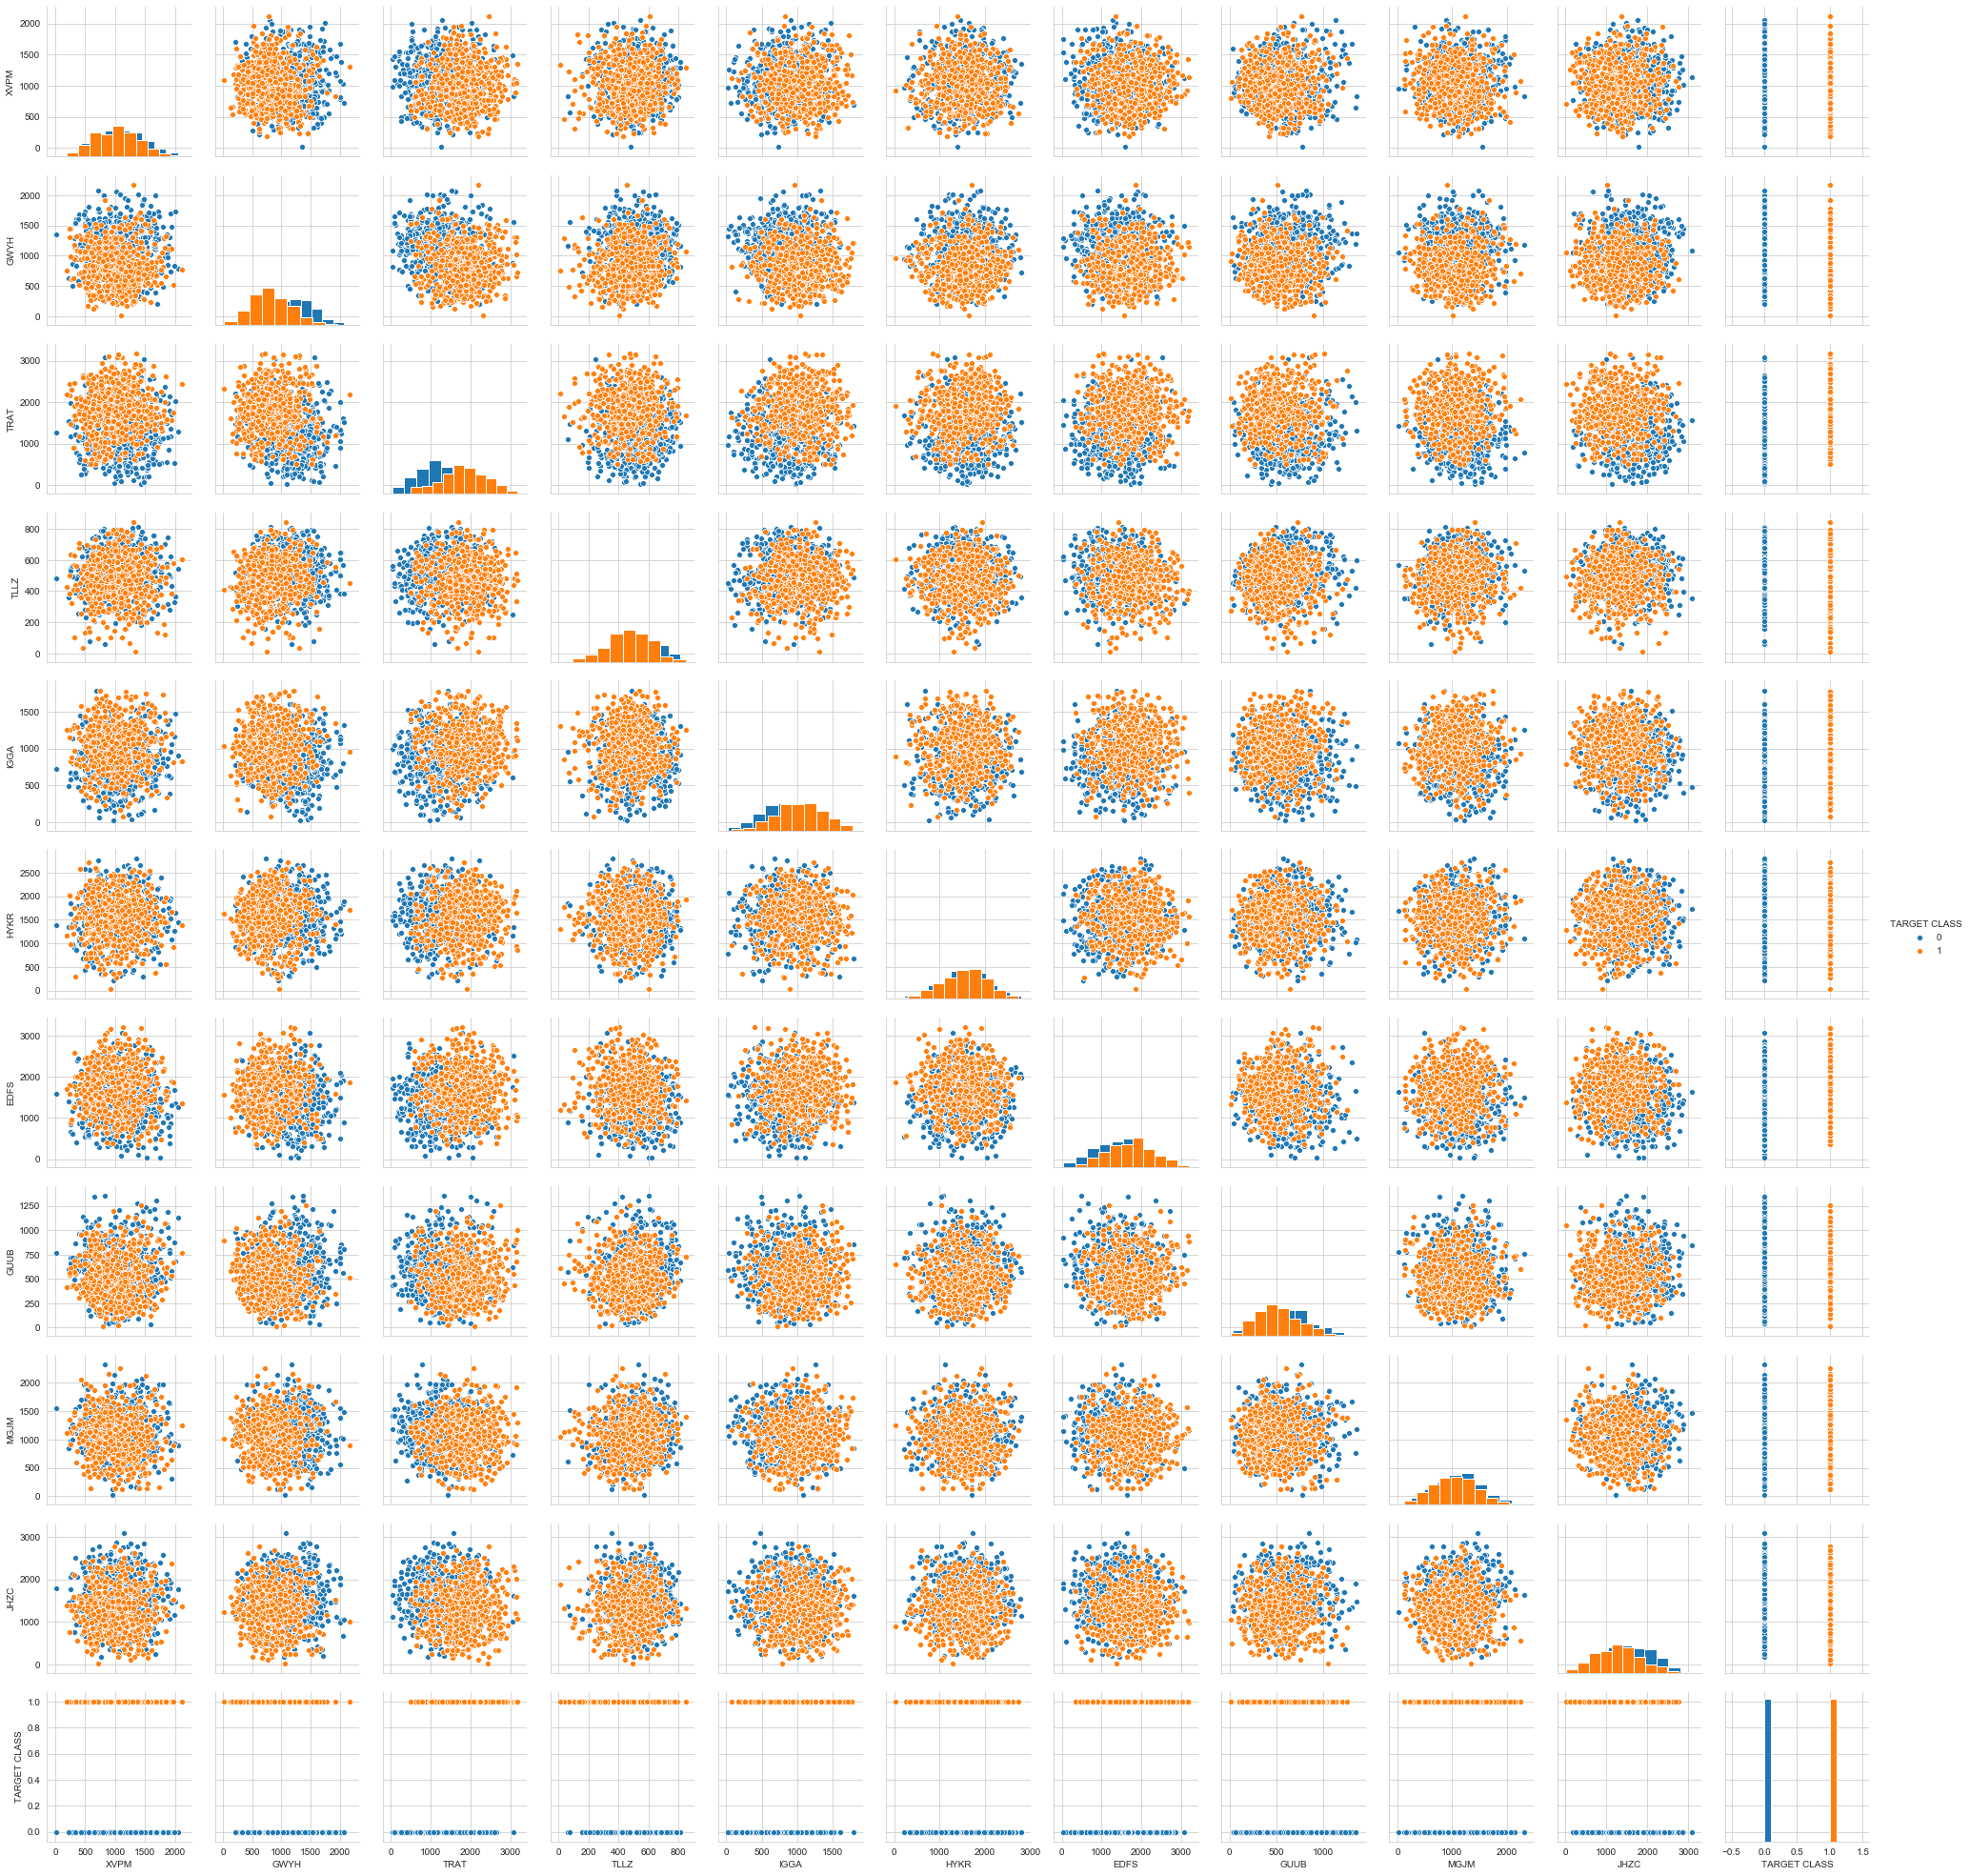

In [15]:
sns.pairplot(df, hue = 'TARGET CLASS',diag_kind="hist" )

# Standardize the Variables

Time to standardize the variables.


In [16]:
from sklearn.preprocessing import StandardScaler 

**Create a StandardScaler() object called scaler.**

In [17]:
scaler = StandardScaler()

**Fit scaler to the features**

In [19]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [21]:
scales_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [23]:
df_feat = pd.DataFrame(scales_features, columns= df.columns[:-1] )
df_feat.head(4)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793


# Train Test Split

**Use train_test_split to split data into a training set and a testing set.**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_feat
y = df['TARGET CLASS']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [27]:
from sklearn.neighbors import KNeighborsClassifier 

**Create a KNN model instance with n_neighbors=1**

In [29]:
knn= KNeighborsClassifier(n_neighbors= 1)

**Fit this KNN model to the training data.**

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [31]:
pred = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
print(confusion_matrix(y_test, pred))

[[101  38]
 [ 36 125]]


In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       139
           1       0.77      0.78      0.77       161

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

For loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.

In [35]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

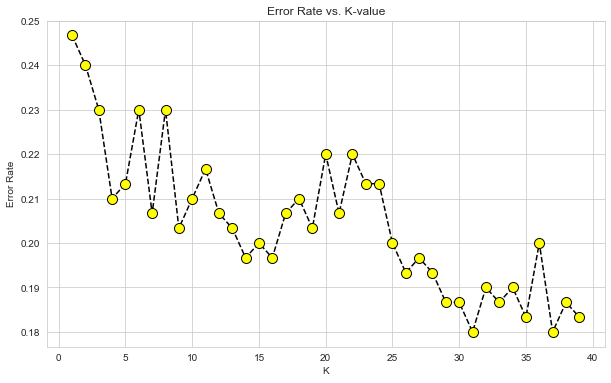

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='black', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [40]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [41]:
print(confusion_matrix(y_test, predictions))

[[112  27]
 [ 27 134]]


In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       139
           1       0.83      0.83      0.83       161

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

